In [58]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

uppath = lambda _path, n: os.sep.join(_path.split(os.sep)[:-n])
PATH_SC2BENCH=uppath(os.path.abspath(''),2)
os.chdir(PATH_SC2BENCH)
PWD=os.getcwd()
print(PWD)

PATH=os.path.join(PWD,"SLURM_N")

items = os.listdir(PATH)

directories = [item for item in items if (os.path.isdir(os.path.join(PATH,item)))]

Final_report = pd.DataFrame()

for config in directories:
    merge_files_path = os.path.join(PATH,config)    
    # list_items = os.listdir(dir)    
    # sim_dir=[item for item in list_items if os.path.isdir(os.path.join(dir,item))]
    # merge_files_path=os.path.join(dir,sim_dir[0])
    # print(sim_dir)
    full_report= pd.read_csv(os.path.join(merge_files_path,"fsim_full_report.csv"),index_col=[0])  
    full_report['MRAD']=abs(100*(full_report['fault_ACC@1']-full_report['gold_ACC@1'])/full_report['gold_ACC@1'])
    full_report['MRADk']=abs(100*(full_report['fault_ACC@k']-full_report['gold_ACC@k'])/full_report['gold_ACC@k'])
    full_report['AbsAD']=abs((full_report['fault_ACC@1']-full_report['gold_ACC@1']))
    full_report['AbsADk']=abs((full_report['fault_ACC@k']-full_report['gold_ACC@k']))
    full_report["FsimID"]=None    
    index=(full_report['bit_faulty_pos']>-1)
    full_report.loc[index,'FsimID']=config # I capture the folder name and assign it to eavery roww of the dataframe
    full_report['split_config']=full_report['FsimID'].apply(lambda x: x.split('_')[2])

    Final_report=pd.concat([Final_report,full_report],axis=0,ignore_index=True)

print(Final_report.head())


['resnet50-bq1ch_from_resnet50_faulty_neurons_0']
['resnet50-bq2ch_from_resnet50_faulty_neurons_0']
['resnet50-bq3ch_from_resnet50_faulty_neurons_0']
['resnet50-bq6ch_from_resnet50_faulty_neurons_0']
['resnet50-bq9ch_from_resnet50_faulty_neurons_0']
['resnet50-bq12ch_from_resnet50_faulty_neurons_0']
['resnet50_faulty_neurons_0']
['resnet50-bq1ch_from_resnet50_faulty_neurons_4']
['resnet50-bq2ch_from_resnet50_faulty_neurons_4']
['resnet50-bq3ch_from_resnet50_faulty_neurons_4']
['resnet50-bq6ch_from_resnet50_faulty_neurons_4']
['resnet50-bq9ch_from_resnet50_faulty_neurons_4']
['resnet50-bq12ch_from_resnet50_faulty_neurons_4']
['resnet50_faulty_neurons_4']
   layer_start  layer_stop  size_tail_y  size_tail_x  block_fault_rate  \
0            0           4           32           32               0.2   
1            0           4           32           32               0.2   
2            0           4           32           32               0.2   
3            0           4           32   

Text(0.5, 1.0, 'MRAD: FI all conv layers of Head model (0-4)')

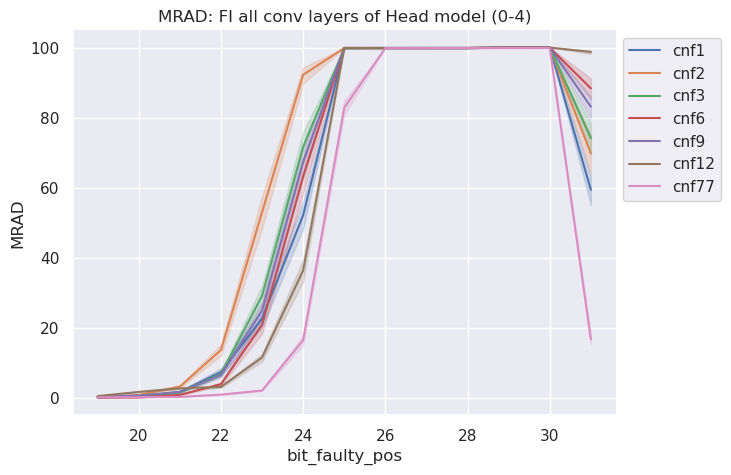

In [59]:

index = (Final_report['bit_faulty_pos']>15) & (Final_report['layer_start']==0)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=Final_report.loc[index],x='bit_faulty_pos',y='MRAD',hue='split_config')
ax.legend(loc='lower left')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: FI all conv layers of Head model (0-4)")
#ax.set_yscale('log')

Text(0.5, 1.0, 'MRAD: FI only in the last layer of the Head model (4)')

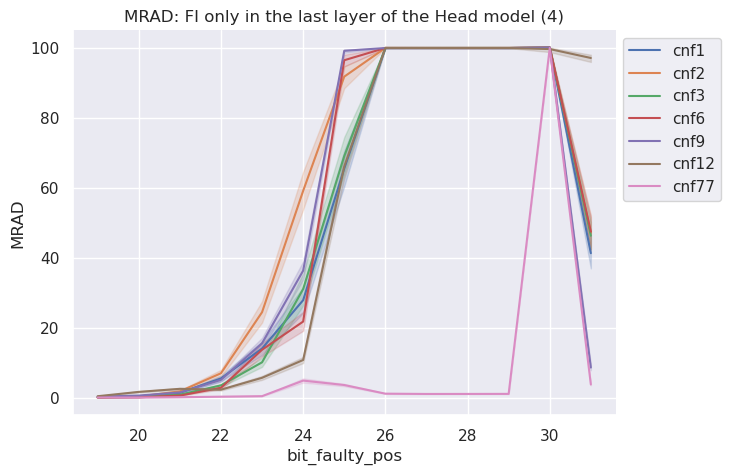

In [60]:

index = (Final_report['bit_faulty_pos']>15) & (Final_report['layer_start']==4)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=Final_report.loc[index],x='bit_faulty_pos',y='MRAD',hue='split_config')
ax.legend(loc='lower left')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: FI only in the last layer of the Head model (4)")
#ax.set_yscale('log')

Text(0.5, 1.0, 'MRAD: FI all conv layers of Head model (0-4)')

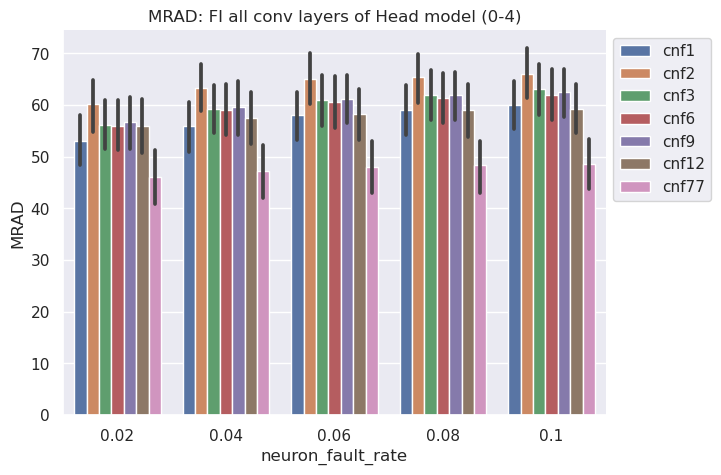

In [61]:
index = (Final_report['bit_faulty_pos']>15) & (Final_report['layer_start']==0)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='neuron_fault_rate',y='MRAD',hue='split_config')
ax.legend(loc='lower left')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: FI all conv layers of Head model (0-4)")
#ax.set_yscale('log')

Text(0.5, 1.0, 'MRAD: FI only in the last layer of the Head model (4)')

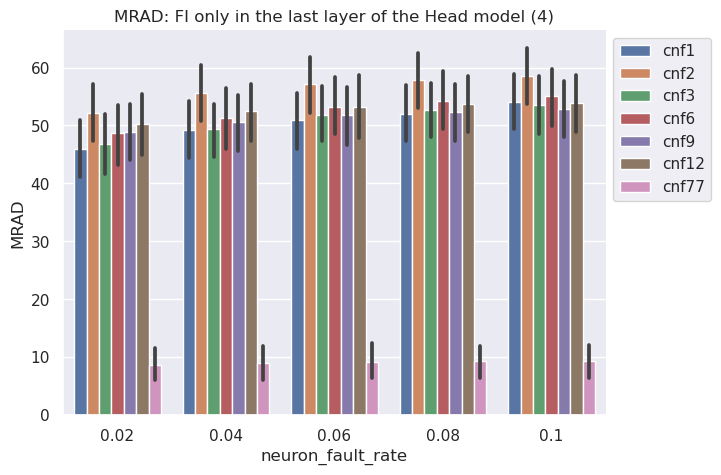

In [62]:
index = (Final_report['bit_faulty_pos']>15) & (Final_report['layer_start']==4)
sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='neuron_fault_rate',y='MRAD',hue='split_config')
ax.legend(loc='lower left')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: FI only in the last layer of the Head model (4)")
#ax.set_yscale('log')

Text(0.5, 1.0, 'MRAD: FI all conv layers of Head model (0-4)')

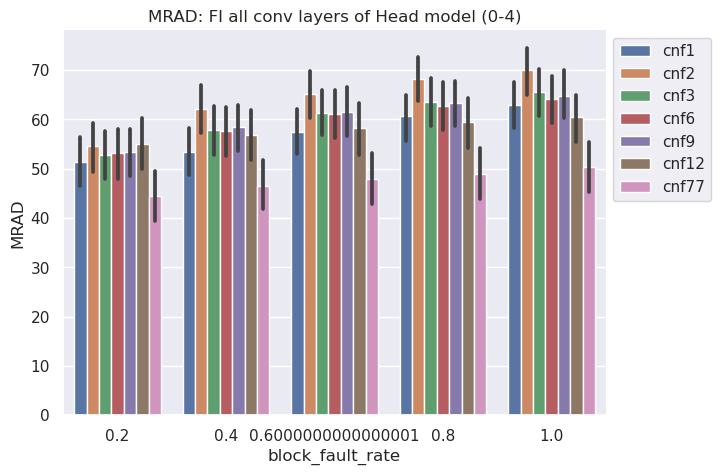

In [63]:
index = (Final_report['bit_faulty_pos']>15) & (Final_report['layer_start']==0)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='block_fault_rate',y='MRAD',hue='split_config')
ax.legend(loc='lower left')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: FI all conv layers of Head model (0-4)")
#ax.set_yscale('log')

Text(0.5, 1.0, 'MRAD: Different Fault rates in all configurations all conv layersd (0-4)')

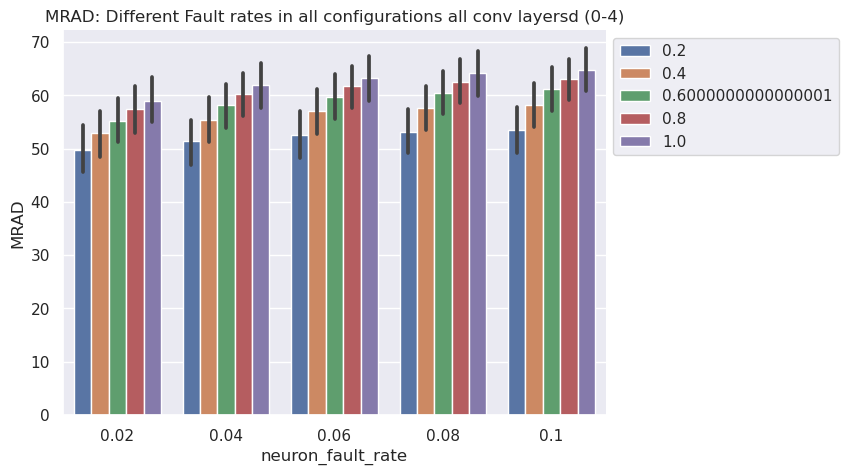

In [64]:

index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer_start']==0)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='neuron_fault_rate',y='MRAD',hue='block_fault_rate')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in all configurations all conv layersd (0-4)")


Text(0.5, 1.0, 'MRAD: Different Fault rates in last conv layer (4)')

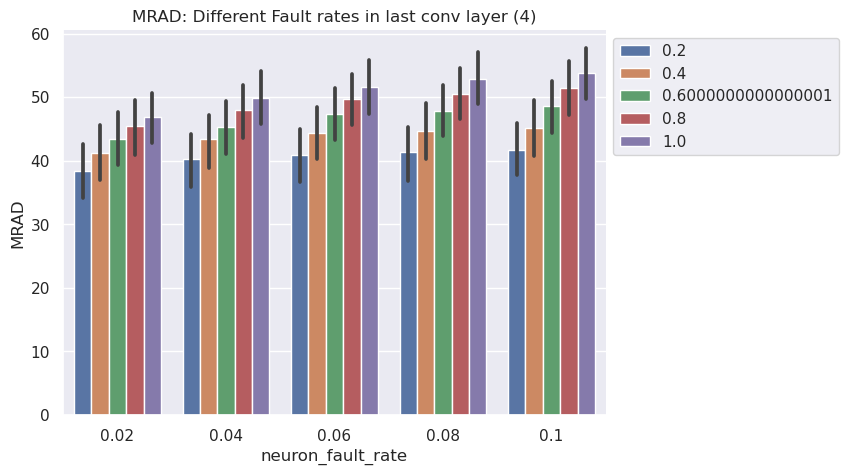

In [65]:
index = (Final_report['bit_faulty_pos']>0) & (Final_report['layer_start']==4)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='neuron_fault_rate',y='MRAD',hue='block_fault_rate')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in last conv layer (4)")

Text(0.5, 1.0, 'MRAD: Different Fault rates in all configurations all conv layersd (0-4)')

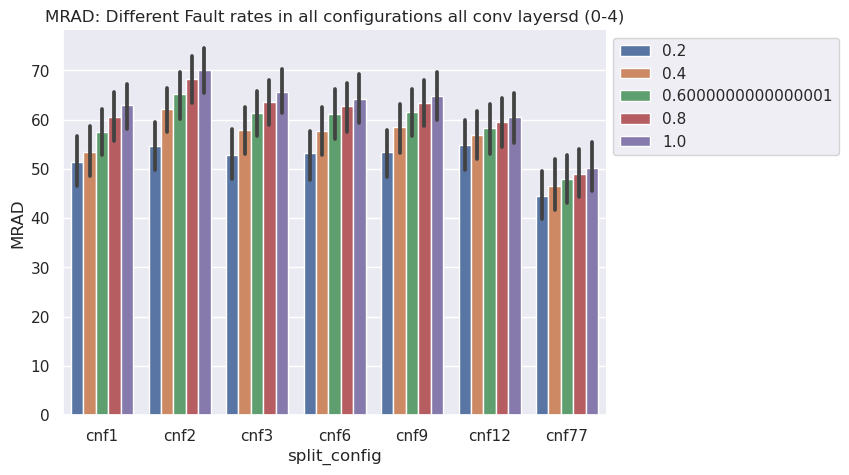

In [69]:
index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer_start']==0)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='split_config',y='MRAD',hue='block_fault_rate')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in all configurations layer (0-4)")

Text(0.5, 1.0, 'MRAD: Different Fault rates in all configurations layer (4)')

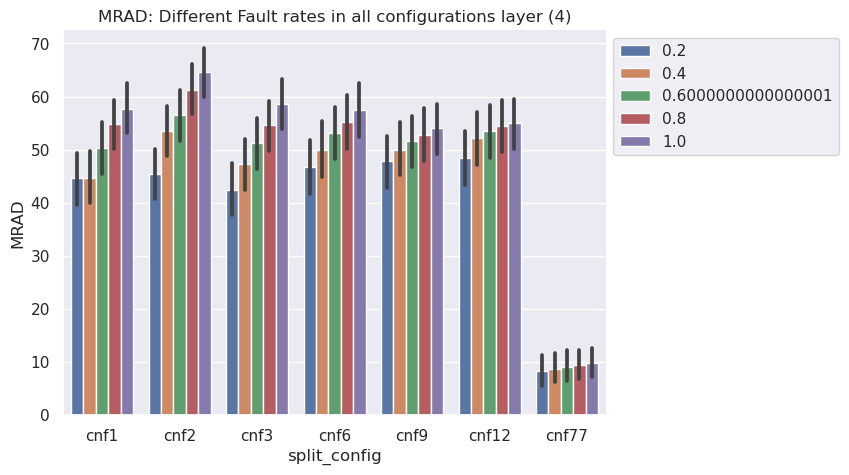

In [81]:
index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer_start']==4)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='split_config',y='MRAD',hue='block_fault_rate')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in all configurations layer (4)")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'MRAD: Different Fault rates in all configurations layer (0-4)')

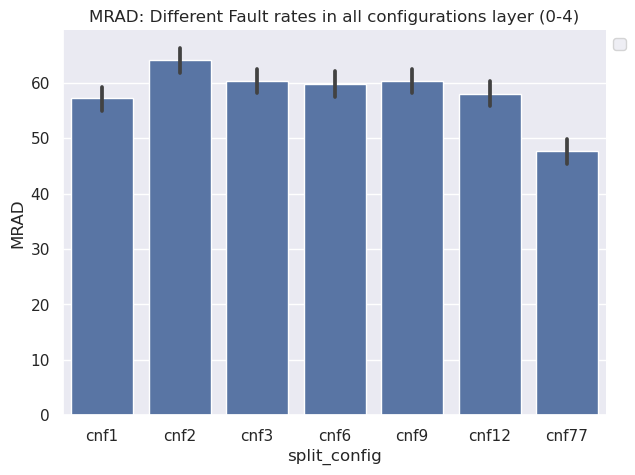

In [76]:
index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer_start']==0)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='split_config',y='MRAD', color='C0')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in all configurations layer (0-4)")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'MRAD: Different Fault rates in all configurations layer (4)')

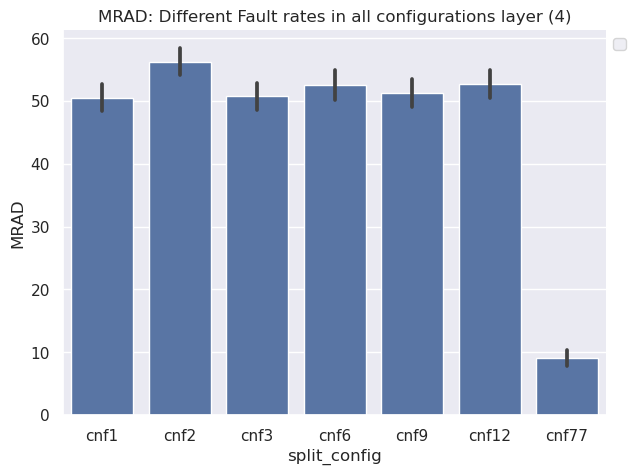

In [77]:
index = (Final_report['bit_faulty_pos']>-1) & (Final_report['layer_start']==4)

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.barplot(data=Final_report.loc[index],x='split_config',y='MRAD',color='C0')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title("MRAD: Different Fault rates in all configurations layer (4)")